In [1]:
from pathlib import Path

from astropy.io import fits
from astropy.visualization import simple_norm
from IPython.display import HTML
from matplotlib import animation
from matplotlib import pyplot as plt
from msvst import MSVST2D, MSVST2D1D

plt.style.use("Solarize_Light2")


def plot_image(image, title, norm=None):
    if not norm:
        norm = simple_norm(image, 'asinh', max_cut=5.2)
        
    plt.title(title)
    plt.imshow(image, origin="lower", norm=norm, cmap="gist_stern")
    plt.axis("off")
    
    return norm


def plot_frames(cube, msvst_a, msvst_b, msvst_c, norm):
    fig, ax = plt.subplots(2, 2, figsize=(5, 5))
    ax = ax.flatten()

    ims = []
    for frame, frame_a, frame_b, frame_c in zip(cube, msvst_a, msvst_b, msvst_c):
        ims_frame = []

        im = ax[0].imshow(frame, origin="lower", cmap="gist_stern", norm=norm, animated=True)
        ax[0].set_axis_off()
        ims_frame.append(im)

        im = ax[1].imshow(frame_a, origin="lower", cmap="gist_stern", norm=norm, animated=True)
        ax[1].set_axis_off()
        ims_frame.append(im)

        im = ax[2].imshow(frame_b, origin="lower", cmap="gist_stern", animated=True)
        ax[2].set_axis_off()
        ims_frame.append(im)

        im = ax[3].imshow(frame_c, origin="lower", cmap="gist_stern", animated=True)
        ax[3].set_axis_off()
        ims_frame.append(im)
        
        ims.append(ims_frame)

        plt.tight_layout()

    plt.close()

    ani = animation.ArtistAnimation(fig, ims, interval=150, blit=True, repeat_delay=1000)
    
    return ani

Using the MSVST denoising module
================================

2D MSVST
--------

In [2]:
help(MSVST2D.denoise)

Help on method denoise in module msvst.msvst:

denoise(input_file: pathlib.Path, output_file=None, coupled=False, verbose=False, **kwargs) method of builtins.type instance
    2D MSVST
    
    Parameters
    ----------
    input_file : Path
        Path for the input fits file.
    output_file : Path, optional
        If None (default), the result is saved in the same path
        as 'input_file', appending the suffix "_msvstatrous" 
        to the file name.
    coupled : bool, optional
        If True, use coupled MSVST, by default False.
    threshold_mode : 0 or 1, optional
        0: p-value threshold (default).
        1: FDR threshold.
    threshold_probability : float, optional
        Two sided Pr or FDR value. 
        If 'threshold_mode' is 0, default 0.000465.
        If 'threshold_mode' is 1, default 0.1.
    border_mode : int, optional
        0: cont.
        1: mirror (default).
        2: period.
        3: zero.
    sigma_level : int or float
        Equivalent Gauss

In [3]:
image_path = Path("data", "rosseta.fits")
image = fits.getdata(image_path)

In [4]:
output_path = image_path.parent / "rosseta_msvst_a.fits"
MSVST2D.denoise(image_path, output_path, verbose=True)
image_msvst_a = fits.getdata(output_path)

[info] Executing MSVST command: msvst_iwt2d -c1 -M0 -E0.000465 -n5 -F1 -I1 -i10 -B1 -v data/rosseta.fits data/rosseta_msvst_a.fits...
[info] Input image : data/rosseta.fits
[info] Output image : data/rosseta_msvst_a.fits
[info] Iteration Filter g = Id-h
[info] Mode : Individual tests
[info] Iterative Mode : L1 - Regularized
[info] Max. Iteration : 10
[info] Border mode : 1
[info] Max scale(s) : 5
[info] First detection scale : 1
[info] Ignore the last approx. band : false
[info] Detect only positive coefficients : false
[info] Initial denoising ... 
[info] Var = 0.793518
[info] scale = 1 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 2 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 3 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 4 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 5 cut-off p-value = 0.000465
[info] Entering into the iterative denoising ...
[info] Iteration = 1 ... 
[info] Iteration = 2 ... 
[info] Iterat

In [5]:
output_path = image_path.with_stem("rosseta_msvst_b")
MSVST2D.denoise(image_path, output_path, kill_last=True, verbose=True)
image_msvst_b = fits.getdata(output_path)

[info] Executing MSVST command: msvst_iwt2d -c1 -M0 -E0.000465 -n5 -F1 -I1 -i10 -B1 -K -v data/rosseta.fits data/rosseta_msvst_b.fits...
[info] Input image : data/rosseta.fits
[info] Output image : data/rosseta_msvst_b.fits
[info] Iteration Filter g = Id-h
[info] Mode : Individual tests
[info] Iterative Mode : L1 - Regularized
[info] Max. Iteration : 10
[info] Border mode : 1
[info] Max scale(s) : 5
[info] First detection scale : 1
[info] Ignore the last approx. band : true
[info] Detect only positive coefficients : false
[info] Initial denoising ... 
[info] Var = 0.793518
[info] scale = 1 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 2 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 3 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 4 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 5 cut-off p-value = 0.000465
[info] Entering into the iterative denoising ...
[info] Iteration = 1 ... 
[info] Iteration = 2 ... 
[info] Iter

In [6]:
output_path = image_path.with_stem("rosseta_msvst_c")
MSVST2D.denoise(image_path, output_path, use_non_default_filter=True, verbose=True)
image_msvst_c = fits.getdata(output_path)

[info] Executing MSVST command: msvst_iwt2d -c1 -M0 -E0.000465 -n5 -F1 -I1 -i10 -B1 -T -v data/rosseta.fits data/rosseta_msvst_c.fits...
[info] Input image : data/rosseta.fits
[info] Output image : data/rosseta_msvst_c.fits
[info] Iteration Filter g = Id-h*h
[info] Mode : Individual tests
[info] Iterative Mode : L1 - Regularized
[info] Max. Iteration : 10
[info] Border mode : 1
[info] Max scale(s) : 5
[info] First detection scale : 1
[info] Ignore the last approx. band : false
[info] Detect only positive coefficients : false
[info] Initial denoising ... 
[info] Var = 0.793518
[info] scale = 1 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 2 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 3 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 4 cut-off p-value = 0.000465
[info] Var = 0.793518
[info] scale = 5 cut-off p-value = 0.000465
[info] Entering into the iterative denoising ...
[info] Iteration = 1 ... 
[info] Iteration = 2 ... 
[info] I

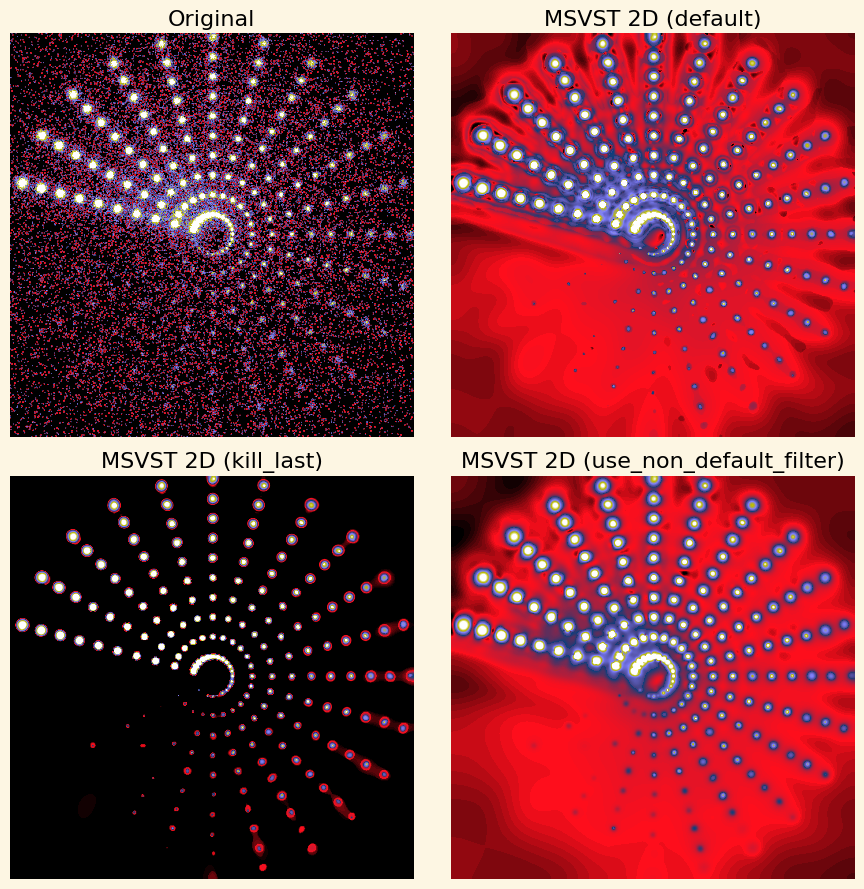

In [7]:
plt.figure(figsize=(9,9))
plt.subplot(221)
norm = plot_image(image, "Original")

plt.subplot(222)
plot_image(image_msvst_a, "MSVST 2D (default)")

plt.subplot(223)
plot_image(image_msvst_b, "MSVST 2D (kill_last)")

plt.subplot(224)
plot_image(image_msvst_c, "MSVST 2D (use_non_default_filter)")

plt.tight_layout()
plt.show()

2D+1D MSVST
------------

In [8]:
help(MSVST2D1D.denoise)

Help on method denoise in module msvst.msvst:

denoise(input_file: pathlib.Path, output_file=None, verbose=False, **kwargs) method of builtins.type instance
    2D+1D MSVST denoising algorithm.
    
    Parameters
    ----------
    input_file : Path
        Path for the input fits file.
    output_file : Path, optional
        If None (default), the result is saved in the same path 
        as 'input_file', appending the suffix "_msvstatrous" 
        to the file name.
    threshold_mode : 0 or 1, optional
        0: p-value threshold (default).
        1: FDR threshold.
    threshold_probability : float, optional
        Two sided Pr or FDR value. 
        If 'threshold_mode' is 0, default 0.000465.
        If 'threshold_mode' is 1, default 0.1.
    border_mode : int, optional
        0: cont.
        1: mirror (default).
        2: period.
        3: zero.
    sigma_level : int or float
        Equivalent Gauss-detection level.
    fdr_indep : bool, optional
        Manual FDR setti

In [9]:
cube_path = Path("data", "grid.fits")
cube = fits.getdata(cube_path)

In [10]:
output_path = cube_path.with_stem("grid_msvst_a")
MSVST2D1D.denoise(cube_path, output_path, verbose=True)
cube_msvst_a = fits.getdata(output_path)

[info] Executing MSVST command: msvst_2d1d -c1 -M0 -E0.000465 -n3 -N5 -F1 -f1 -I1 -i10 -B1 -v data/grid.fits data/grid_msvst_a.fits...
[info] Input image : data/grid.fits
[info] Output image : data/grid_msvst_a.fits
[info] Iteration Filter g = Id-h
[info] Mode : Individual tests
[info] Iterative Mode : L1 - Regularized
[info] Max. Iteration : 10
[info] Border mode : 1
[info] Max scalexy(s) : 3
[info] Max scalez(s) : 4
[info] First detection scalexy : 1
[info] First detection scalez : 1
[info] Ignore the last approx. band : false
[info] Detect only positive coefficients : false
[info] Use modified variance corrections : false
[info] Initial denoising ... 
[info] Atrous transform ... 
[info] (scalexy, scalez) = (1, 1) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 2) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 3) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 4) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 4) cut-off p-value = 0.000465
[in

In [11]:
output_path = cube_path.with_stem("grid_msvst_b")
MSVST2D1D.denoise(cube_path, output_path, kill_last=True, verbose=True)
cube_msvst_b = fits.getdata(output_path)

[info] Executing MSVST command: msvst_2d1d -c1 -M0 -E0.000465 -n3 -N5 -F1 -f1 -I1 -i10 -B1 -K -v data/grid.fits data/grid_msvst_b.fits...
[info] Input image : data/grid.fits
[info] Output image : data/grid_msvst_b.fits
[info] Iteration Filter g = Id-h
[info] Mode : Individual tests
[info] Iterative Mode : L1 - Regularized
[info] Max. Iteration : 10
[info] Border mode : 1
[info] Max scalexy(s) : 3
[info] Max scalez(s) : 4
[info] First detection scalexy : 1
[info] First detection scalez : 1
[info] Ignore the last approx. band : true
[info] Detect only positive coefficients : false
[info] Use modified variance corrections : false
[info] Initial denoising ... 
[info] Atrous transform ... 
[info] (scalexy, scalez) = (1, 1) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 2) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 3) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 4) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 4) cut-off p-value = 0.000465
[

In [12]:
output_path = cube_path.with_stem("grid_msvst_c")
MSVST2D1D.denoise(cube_path, output_path, use_non_default_filter=True, verbose=True)
cube_msvst_c = fits.getdata(output_path)

[info] Executing MSVST command: msvst_2d1d -c1 -M0 -E0.000465 -n3 -N5 -F1 -f1 -I1 -i10 -B1 -T -v data/grid.fits data/grid_msvst_c.fits...
[info] Input image : data/grid.fits
[info] Output image : data/grid_msvst_c.fits
[info] Iteration Filter g = Id-h*h
[info] Mode : Individual tests
[info] Iterative Mode : L1 - Regularized
[info] Max. Iteration : 10
[info] Border mode : 1
[info] Max scalexy(s) : 3
[info] Max scalez(s) : 4
[info] First detection scalexy : 1
[info] First detection scalez : 1
[info] Ignore the last approx. band : false
[info] Detect only positive coefficients : false
[info] Use modified variance corrections : false
[info] Initial denoising ... 
[info] Atrous transform ... 
[info] (scalexy, scalez) = (1, 1) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 2) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 3) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 4) cut-off p-value = 0.000465
[info] (scalexy, scalez) = (1, 4) cut-off p-value = 0.00046

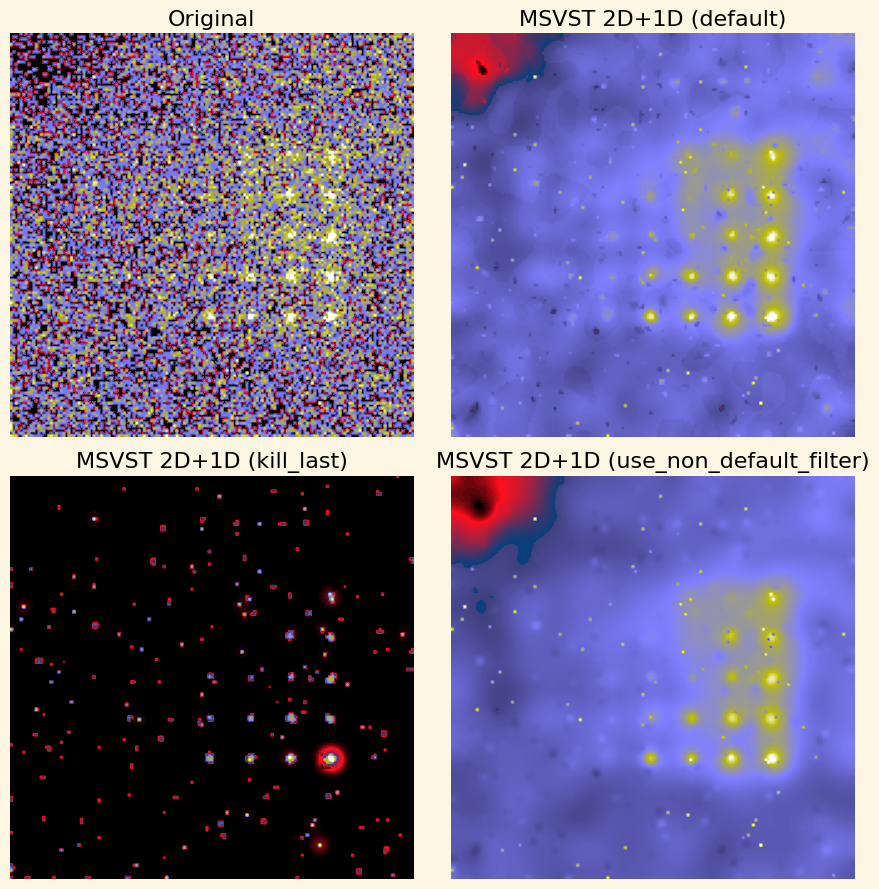

In [13]:
plt.figure(figsize=(9,9))
plt.subplot(221)
norm = plot_image(cube.sum(axis=0), "Original")

plt.subplot(222)
plot_image(cube_msvst_a.sum(axis=0), "MSVST 2D+1D (default)")

plt.subplot(223)
plot_image(cube_msvst_b.sum(axis=0), "MSVST 2D+1D (kill_last)")

plt.subplot(224)
plot_image(cube_msvst_c.sum(axis=0), "MSVST 2D+1D (use_non_default_filter)")

plt.tight_layout()
plt.show()

In [14]:
ani = plot_frames(cube, cube_msvst_a, cube_msvst_b, cube_msvst_c, norm)
HTML(ani.to_jshtml())